 **ECG Classification | CNN RNN LSTM**




---



---










In [ ]:
# Import the necessary module to connect to Google Drive
from google.colab import drive
# Mount your Google Drive to the Colab notebook instance
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
i# Import the necessary module to work with zip files
import zipfile

# Set the path to the ZIP file in your Drive
dontGIVE_UP = '/content/drive/MyDrive/donGIVE_UP.zip'

# Extract the contents of the ZIP file to a directory in Colab
with zipfile.ZipFile(dontGIVE_UP, 'r') as zip_ref:
    zip_ref.extractall('/content/input')

In [ ]:

# Set the path to the ZIP file in your Drive
files_pth = '/content/drive/MyDrive/files_pth.zip'

# Extract the contents of the ZIP file to a directory in Colab
with zipfile.ZipFile(files_pth, 'r') as zip_ref:
    zip_ref.extractall('/content/input')

In [ ]:
# Import necessary modules for data processing and visualization
import os
import itertools
import time
import random

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
# Import necessary modules for PyTorch modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import (CosineAnnealingLR,
                                      CosineAnnealingWarmRestarts,
                                      StepLR,
                                      ExponentialLR)
# Import necessary modules for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score

hold configuration parameters for the project






In [ ]:
# Define a Config class to hold configuration parameters
class Config:
      # Define a variable for the CSV file path
    csv_path = ''
        # Define a variable for the random seed
    seed = 2021
        # Define a variable for the device to be used for computation (GPU or CPU)
    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
        # Define variables for the paths to save model states for attention, LSTM, and CNN models
    attn_state_path = '/content/input/attn.pth'
    lstm_state_path = '/content/input/lstm.pth'
    cnn_state_path = '/content/input/cnn.pth'
        # Define variables for the paths to save training logs for attention, LSTM, and CNN models
    attn_logs = '/content/input/attn.csv'
    lstm_logs = '/content/input/lstm.csv'
    cnn_logs = '/content/input/cnn.csv'
        # Define variables for the paths to the training and test CSV files
    train_csv_path = '/content/input/mitbih_with_syntetic_train.csv'
    test_csv_path = '/content/input/mitbih_with_syntetic_test.csv'

In [ ]:
# Define a function to set the random seed for reproducibility
def seed_everything(seed: int):
      # Set the random seed for the random library
    random.seed(seed)
        # Set the random seed for the numpy library
    np.random.seed(seed)
        # Set the random seed for the PyTorch library
    torch.manual_seed(seed)
        # If a GPU is available, set the random seed for the GPU
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
 # Create an instance of the Config class
config = Config()
# Call the seed_everything function to set the random seed for reproducibility
seed_everything(config.seed)

In [ ]:
# Read the 'ptbdb_abnormal.csv' file and assign it to the 'df_ptbdb' data frame
df_ptbdb = pd.read_csv('/content/input/ptbdb_abnormal.csv')
# Read the 'ptbdb_normal.csv' file and assign it to the 'df_mitbih' data frame
df_mitbih = pd.read_csv('/content/input/ptbdb_normal.csv')
# Display the contents of the 'df_ptbdb' data frame
df_ptbdb

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10500,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10501,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Read the 'mitbih_train.csv' file and assign it to the 'df_mitbih_train' data frame
df_mitbih_train = pd.read_csv('/content/input/mitbih_train.csv', header=None)
# Read the 'mitbih_test.csv' file and assign it to the 'df_mitbih_test' data frame
df_mitbih_test = pd.read_csv('/content/input/mitbih_test.csv', header=None)
# Concatenate the two data frames vertically into a single data frame 'df_mitbih'
df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)
# Rename the last column of the data frame to 'class'
df_mitbih.rename(columns={187: 'class'}, inplace=True)
# Create a dictionary that maps the class IDs to their respective labels

id_to_label = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}
# Map the class IDs to their respective labels and add a new 'label' column to the data frame
df_mitbih['label'] = df_mitbih.iloc[:, -1].map(id_to_label)
# Print the information about the data frame
print(df_mitbih.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109446 entries, 0 to 21891
Columns: 189 entries, 0 to label
dtypes: float64(188), object(1)
memory usage: 158.7+ MB
None


In [ ]:
# Save the preprocessed dataset as a CSV file
df_mitbih.to_csv('data.csv', index=False)
# Update the CSV path in the configuration
config.csv_path = 'data.csv'

**Basic EDA**

In [ ]:
# Load the preprocessed dataset from the CSV file
df_mitbih = pd.read_csv(config.csv_path)
# Count the number of examples for each class label
df_mitbih['label'].value_counts()

Normal                               90589
Fusion of paced and normal            8039
Premature ventricular contraction     7236
Artial Premature                      2779
Fusion of ventricular and normal       803
Name: label, dtype: int64

**Visualization of Class Distribution in Original Dataset**

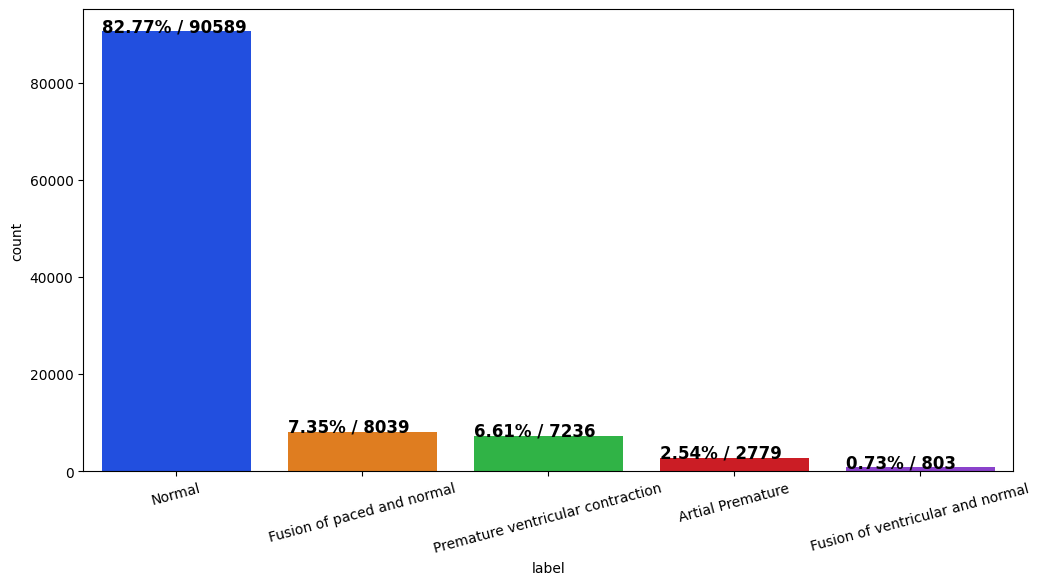

In [ ]:
# calculate the percentage of each class in the dataset
percentages = [count / df_mitbih.shape[0] * 100 for count in df_mitbih['label'].value_counts()]
#create a new figure with a size of 12x6 inches.
fig, ax = plt.subplots(figsize=(12, 6))
# Plot a countplot for the 'label' column in the dataframe using seaborn library
# Specify the axis to plot on and the color palette to use
# Order the bars in the plot based on the descending count of each label class
sns.countplot(
    x=df_mitbih['label'],
    ax=ax,
    palette="bright",
    order=df_mitbih['label'].value_counts().index
)
# Set the x-tick labels of the plot to be rotated 15 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);
# For each bar in the plot, annotate the percentage and count of that label class
# Retrieve the percentage and count values using zip() function and pack them into 3 variables: percentage, count, p
# Add the percentage and count as text to the top of each bar using annotate() function

for percentage, count, p in zip(
    percentages,
    df_mitbih['label'].value_counts(sort=True).values,
    ax.patches):

    percentage = f'{np.round(percentage, 2)}%'# Format the percentage value to 2 decimal places and add '%' symbol
    x = p.get_x() + p.get_width() / 2 - 0.4# Calculate the x-coordinate of the annotation
    y = p.get_y() + p.get_height()# Calculate the y-coordinate of the annotation
    ax.annotate(str(percentage)+" / "+str(count), (x, y), fontsize=12, fontweight='bold')
# Save the figure as a png and svg files
plt.savefig('data_dist.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('data_dist.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

In [ ]:
# set the path to the new CSV file
config.csv_path = '/content/input/mitbih_with_syntetic.csv'
# load the new dataset from the CSV file into a pandas DataFrame
df_mitbih_new = pd.read_csv(config.csv_path)


**Visualizing the Class Distribution Before and After Balancing the Dataset**

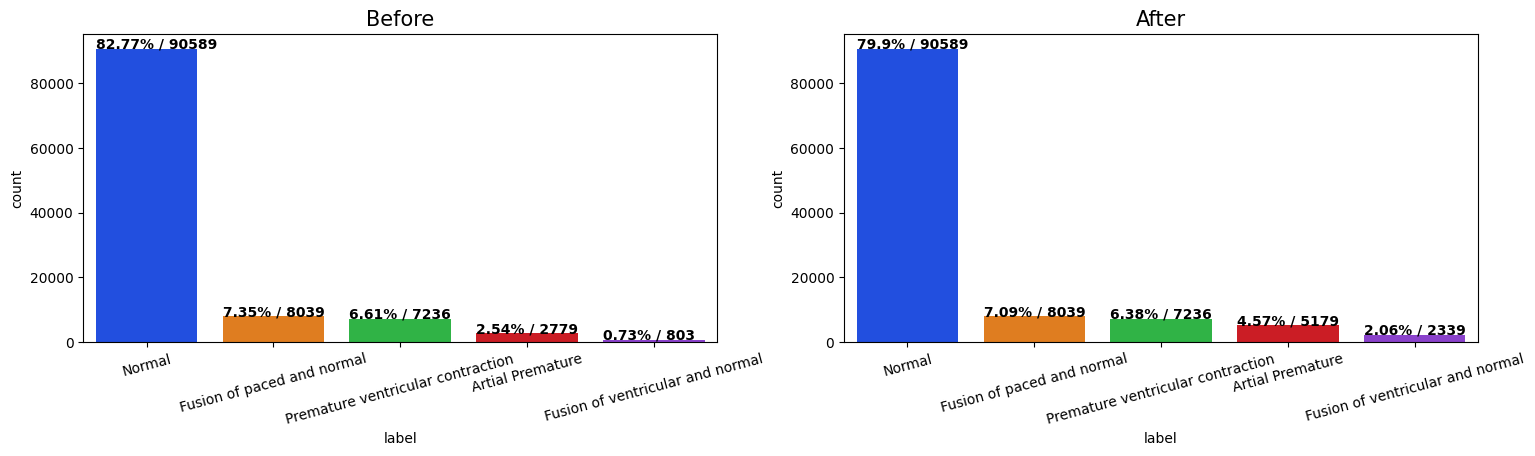

In [ ]:
# Compute the percentage of each class in the original dataset
percentages1 = [count / df_mitbih.shape[0] * 100 for count in df_mitbih['label'].value_counts()]
# Compute the percentage of each class in the balanced dataset
percentages2 = [count / df_mitbih_new.shape[0] * 100 for count in df_mitbih_new['label'].value_counts()]
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(1,2, figsize=(18, 4))

# plot the original dataset
sns.countplot(
    x=df_mitbih['label'],
    ax=axs[0],
    palette="bright",
    order=df_mitbih['label'].value_counts().index
)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=15);
axs[0].set_title("Before", fontsize=15)
# annotate the percentage and count for each class in the original dataset
for percentage, count, p in zip(
    percentages1,
    df_mitbih['label'].value_counts(sort=True).values,
    axs[0].patches):

    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    axs[0].annotate(str(percentage)+" / "+str(count), (x, y), fontsize=10, fontweight='bold')

# plot the new (balanced) dataset
sns.countplot(
    x=df_mitbih_new['label'],
    ax=axs[1],
    palette="bright",
    order=df_mitbih_new['label'].value_counts().index
)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=15);
axs[1].set_title("After", fontsize=15)
# annotate the percentage and count for each class in the new dataset
for percentage, count, p in zip(
    percentages2,
    df_mitbih_new['label'].value_counts(sort=True).values,
    axs[1].patches):

    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    axs[1].annotate(str(percentage)+" / "+str(count), (x, y), fontsize=10, fontweight='bold')
# save the figure as png and svg files
#plt.suptitle("Balanced Sampling between classes", fontsize=20, weight="bold", y=1.01)
plt.savefig('data_dist.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('data_dist.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

**Plotting Samples of ECG Signals per Class**

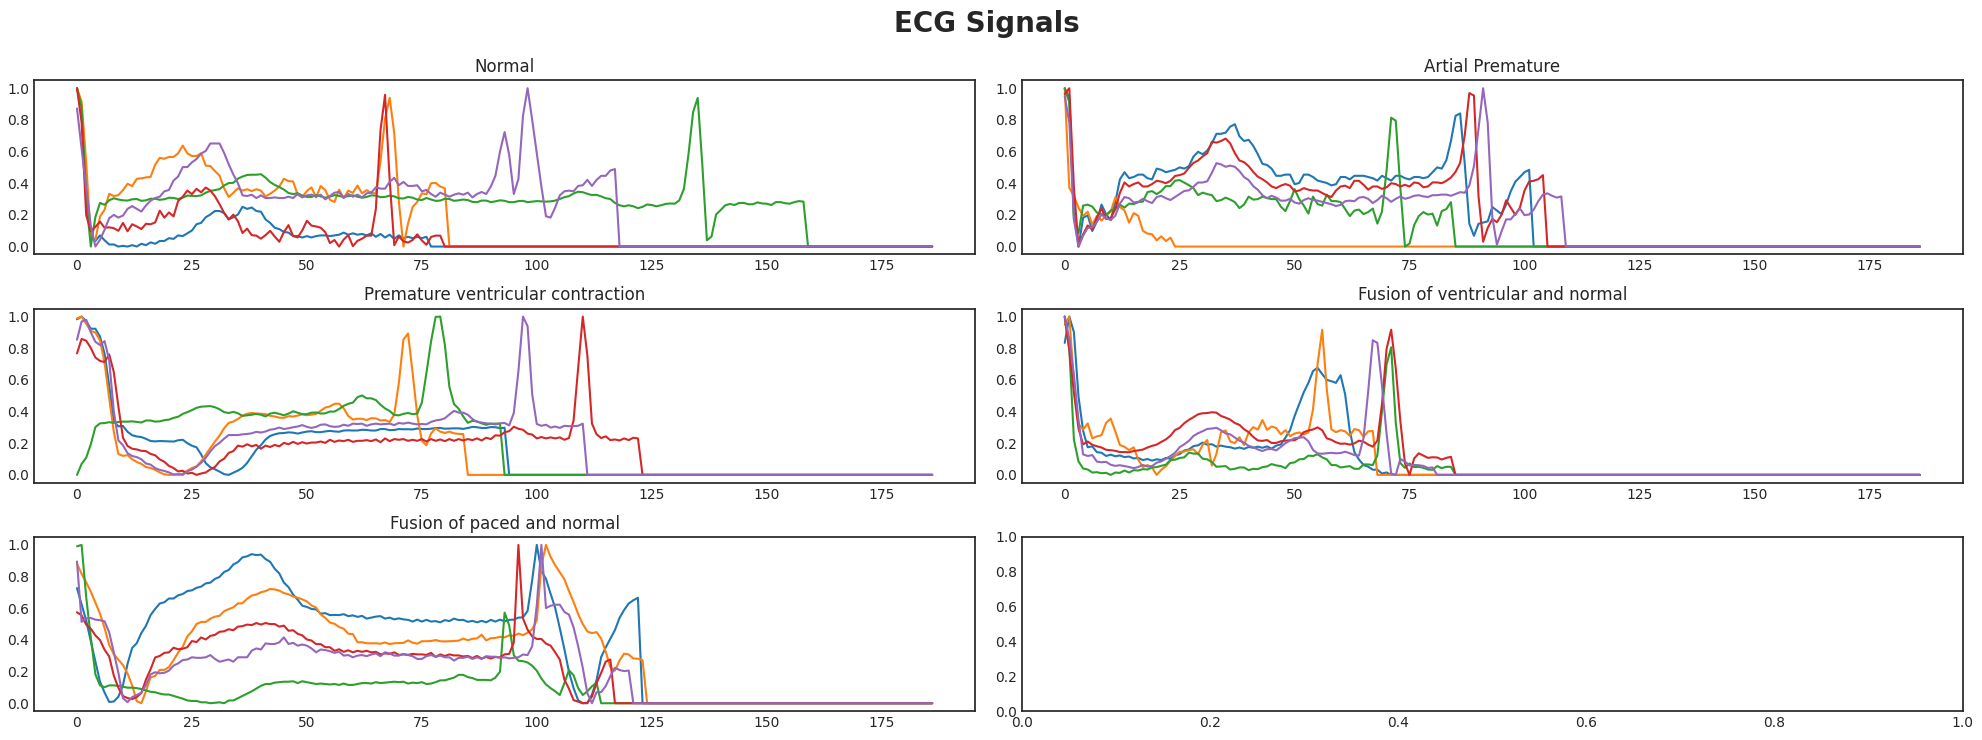

In [ ]:
#Define number of samples per class
N = 5
#Create a list of samples from each class
samples = [df_mitbih.loc[df_mitbih['class'] == cls].sample(N) for cls in range(N)]
#Create a list of titles for each subplot
titles = [id_to_label[cls] for cls in range(5)]
#Set the plot style

with plt.style.context("seaborn-white"):
  # Create the figure with 3 rows and 2 columns of subplots
    fig, axs = plt.subplots(3, 2, figsize=(20, 7))
    # Plot the samples from each class on its own subplot
    for i in range(5):
        ax = axs.flat[i]
        ax.plot(samples[i].values[:,:-2].transpose())
        ax.set_title(titles[i])
        #plt.ylabel("Amplitude")
# Add spacing between subplots
    plt.tight_layout()
  # Add title to the figure
    plt.suptitle("ECG Signals", fontsize=20, y=1.05, weight="bold")
  # Save the figure as SVG format
    plt.savefig(f"signals_per_class.svg",
                    format="svg",bbox_inches='tight', pad_inches=0.2)
        # Save the figure as PNG format
    plt.savefig(f"signals_per_class.png",
                    format="png",bbox_inches='tight', pad_inches=0.2)

**extract signal data and class labels, and checks the number of unique signal values**

In [ ]:
%%time
#Extract signal data from each row in the DataFrame and convert to a list of strings
signals = [' '.join(df_mitbih.iloc[i, :-1].apply(str).values) for i in range(df_mitbih.shape[0])]
#Extract class labels from the last column of the DataFrame and convert to a list
y = df_mitbih.iloc[:, -1].values.tolist()
#Print the number of signals and class labels
print(len(signals), len(y))
#Print the number of unique signal values

print(f'data has {len(set([sig for line in signals for sig in line.split()]))} out of 16 372 411 unique values.')

109446 109446
data has 279149 out of 16 372 411 unique values.
CPU times: user 1min 26s, sys: 6.64 s, total: 1min 32s
Wall time: 1min 30s


**Define a custom PyTorch dataset class for the ECG dataset**

In [ ]:
#class ECGDataset
class ECGDataset(Dataset):
# Initialize the dataset with the dataframe passed as an argument
    def __init__(self, df):
        self.df = df
        self.data_columns = self.df.columns[:-2].tolist()
# Implement the __getitem__ method to return a single sample of data and target
    def __getitem__(self, idx):
          # Extract the ECG signal from the dataframe at the given index
        signal = self.df.loc[idx, self.data_columns].astype('float32')
            # Convert the signal to a PyTorch tensor
        signal = torch.FloatTensor([signal.values])
            # Extract the class label from the dataframe at the given index
        target = torch.LongTensor(np.array(self.df.loc[idx, 'class']))
        return signal, target
# Implement the __len__ method to return the total number of samples in the dataset
    def __len__(self):
        return len(self.df)

**Function for Creating DataLoader from ECG Dataset**
which is responsible for loading the ECG data in batches during the training or validation phase of the deep learning model

In [ ]:
def get_dataloader(phase: str, batch_size: int = 96) -> DataLoader:
    '''
    Dataset and DataLoader.
    Parameters:
        pahse: training or validation phase.
        batch_size: data per iteration.
    Returns:
        data generator
    '''
        # Read the csv file
    df = pd.read_csv(config.train_csv_path)
        # Split the data into training and validation sets
    train_df, val_df = train_test_split(
        df, test_size=0.15, random_state=config.seed, stratify=df['label']
    )
        # Reset the index of the dataframes
    train_df, val_df = train_df.reset_index(drop=True), val_df.reset_index(drop=True)
        # Select the data based on the phase
    df = train_df if phase == 'train' else val_df
        # Create the ECGDataset object
    dataset = ECGDataset(df)
        # Create the DataLoader object
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size, num_workers=4)
    return dataloader

**Define activation function**

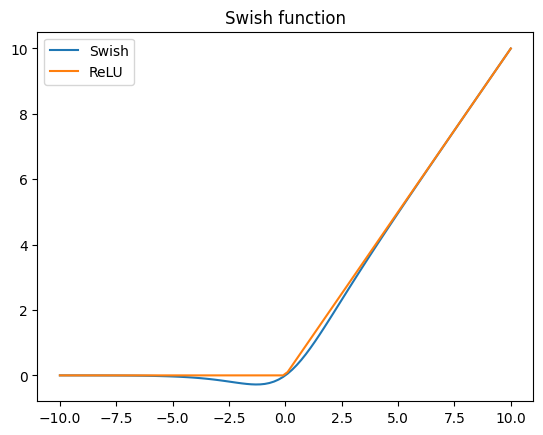

In [ ]:
 #Define a class for Swish activation function
 class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)
#Generate input tensor
x = torch.linspace(-10.0, 10.0, 100)
#Instantiate Swish module and apply to input
swish = Swish()
swish_out = swish(x)
#Apply ReLU activation function to input
relu_out = torch.relu(x)
#Plot both activation functions
plt.title('Swish function')
plt.plot(x.numpy(), swish_out.numpy(), label='Swish')
plt.plot(x.numpy(), relu_out.numpy(), label='ReLU')
plt.legend();
plt.show()

**define a Convolutional Neural Network (CNN) module class called 'ConvNormPool'**

In [ ]:
class ConvNormPool(nn.Module):
    """Conv Skip-connection module"""
    def __init__(
        self,
        input_size,
        hidden_size,
        kernel_size,
        norm_type='bachnorm'
    ):
        super().__init__()
        # Store kernel size and convolutional layers with specified parameters
        self.kernel_size = kernel_size
        self.conv_1 = nn.Conv1d(
            in_channels=input_size,
            out_channels=hidden_size,
            kernel_size=kernel_size
        )
        self.conv_2 = nn.Conv1d(
            in_channels=hidden_size,
            out_channels=hidden_size,
            kernel_size=kernel_size
        )
        self.conv_3 = nn.Conv1d(
            in_channels=hidden_size,
            out_channels=hidden_size,
            kernel_size=kernel_size
        )
            # Define Swish activation functions
        self.swish_1 = Swish()
        self.swish_2 = Swish()
        self.swish_3 = Swish()
            # Determine normalization type and apply normalization layers
        if norm_type == 'group':
            self.normalization_1 = nn.GroupNorm(
                num_groups=8,
                num_channels=hidden_size
            )
            self.normalization_2 = nn.GroupNorm(
                num_groups=8,
                num_channels=hidden_size
            )
            self.normalization_3 = nn.GroupNorm(
                num_groups=8,
                num_channels=hidden_size
            )
        else:
            self.normalization_1 = nn.BatchNorm1d(num_features=hidden_size)
            self.normalization_2 = nn.BatchNorm1d(num_features=hidden_size)
            self.normalization_3 = nn.BatchNorm1d(num_features=hidden_size)
             # Define a max-pooling layer
        self.pool = nn.MaxPool1d(kernel_size=2)
   # Define the forward method of this module
    def forward(self, input):
        conv1 = self.conv_1(input)
        x = self.normalization_1(conv1)
        x = self.swish_1(x)
        x = F.pad(x, pad=(self.kernel_size - 1, 0))

        x = self.conv_2(x)
        x = self.normalization_2(x)
        x = self.swish_2(x)
        x = F.pad(x, pad=(self.kernel_size - 1, 0))

        conv3 = self.conv_3(x)
        x = self.normalization_3(conv1+conv3)
        x = self.swish_3(x)
        x = F.pad(x, pad=(self.kernel_size - 1, 0))

        x = self.pool(x)
        return x

# Nouvelle section

In [ ]:
#defines a new class called CNN that extends the PyTorch nn.Module class
class CNN(nn.Module):
  #defines the constructor method for the CNN class, which takes several parameters
    def __init__(
        self,
         #the number of input features for the network.
        input_size = 1,
        # the number of hidden units to use in each convolutional layer
        hid_size = 256,
        #the size of the convolutional kernel to use
        kernel_size = 5,
        #the number of output classes for the network
        num_classes = 5,
    ):
        #initializes the module
        super().__init__()
        #creates a new ConvNormPool layer and assigns it to the conv1 attribute of the CNN class
        self.conv1 = ConvNormPool(
            input_size=input_size,
            hidden_size=hid_size,
            kernel_size=kernel_size,
        )
        # Creates a new ConvNormPool layer and assigns it to the conv2 attribute of the CNN class
        self.conv2 = ConvNormPool(
            input_size=hid_size,
            hidden_size=hid_size//2,
            kernel_size=kernel_size,
        )
        # Creates a new ConvNormPool layer and assigns it to the conv3 attribute of the CNN class
        self.conv3 = ConvNormPool(
            input_size=hid_size//2,
            hidden_size=hid_size//4,
            kernel_size=kernel_size,
        )
        # Creates a new AdaptiveAvgPool1d layer and assigns it to the avgpool attribute of the CNN class

        self.avgpool = nn.AdaptiveAvgPool1d((1))
       # Creates a new Linear layer and assigns it to the fc attribute of the CNN class
        self.fc = nn.Linear(in_features=hid_size//4, out_features=num_classes)

    def forward(self, input):
              # Passes the input through the conv1 layer and assigns the result to the variable x
        x = self.conv1(input)
                # Passes the input through the conv1 layer and assigns the result to the variable x
        x = self.conv2(x)
                # Passes the input through the conv1 layer and assigns the result to the variable x
        x = self.conv3(x)
                # Passes the x variable through the avgpool layer and assigns the result to x
        x = self.avgpool(x)
        # Reshapes the x variable to have a size of (-1, num_features * num_channels)
        x = x.view(-1, x.size(1) * x.size(2))
                # Passes the x variable through the softmax function applied to the fc layer and assigns the result to x
        x = F.softmax(self.fc(x), dim=1)
                # Returns the x variable as the output of the forward pass
        return x

**define a Recurrent Neural Network (RNN) module class**



In [ ]:
class RNN(nn.Module):
    """RNN module(cell type lstm or gru)"""
    def __init__(
        self,
        input_size,
        hid_size,
        num_rnn_layers=1,
        dropout_p = 0.2,
        bidirectional = False,
        rnn_type = 'lstm',
    ):
        super().__init__()

        if rnn_type == 'lstm':
            self.rnn_layer = nn.LSTM(
                input_size=input_size,
                hidden_size=hid_size,
                num_layers=num_rnn_layers,
                dropout=dropout_p if num_rnn_layers>1 else 0,
                bidirectional=bidirectional,
                batch_first=True,
            )

        else:
            self.rnn_layer = nn.GRU(
                input_size=input_size,
                hidden_size=hid_size,
                num_layers=num_rnn_layers,
                dropout=dropout_p if num_rnn_layers>1 else 0,
                bidirectional=bidirectional,
                batch_first=True,
            )
    def forward(self, input):
        outputs, hidden_states = self.rnn_layer(input)
        return outputs, hidden_states

**define a Recurrent Neural Network (RNN) module class called 'RNNModel'**

In [ ]:
class RNNModel(nn.Module):
    def __init__(

        self,
        input_size,          # input size of the RNN
        hid_size,            # hidden size of the RNN
        num_rnn_layers=1,    # number of RNN layers
        dropout_p=0.2,       # dropout probability for regularization
        bidirectional=False, # whether to use a bidirectional RNN or not
        rnn_type='lstm',     # type of RNN cell to use (LSTM or GRU)
    ):
        super().__init__()

        # Initialize an RNN module with specified hyperparameters
        self.rnn_layer = RNN(
            input_size=46,#hid_size * 2 if bidirectional else hid_size,
            hid_size=hid_size,
            rnn_type=rnn_type,
            bidirectional=bidirectional
        )

        # Initialize two ConvNormPool layers with specified hyperparameters
        self.conv1 = ConvNormPool(
            input_size=input_size,
            hidden_size=hid_size,
            kernel_size=kernel_size,
        )
        self.conv2 = ConvNormPool(
            input_size=hid_size,
            hidden_size=hid_size,
            kernel_size=kernel_size,
        )

        # Initialize an AdaptiveAvgPool1d layer to compute average pooling
        # of an input tensor over a specified output size
        self.avgpool = nn.AdaptiveAvgPool1d((1))

        # Initialize a linear layer with specified input and output dimensions
        self.fc = nn.Linear(in_features=hid_size, out_features=n_classes)

    def forward(self, input):
        # Apply first ConvNormPool layer
        x = self.conv1(input)

        # Apply second ConvNormPool layer
        x = self.conv2(x)

        # Apply RNN layer with the output from the second ConvNormPool layer
        x, _ = self.rnn_layer(x)

        # Apply the AdaptiveAvgPool1d layer to compute the average pooling over x
        x = self.avgpool(x)

        # Reshape x to flatten it into a 2D tensor
        x = x.view(-1, x.size(1) * x.size(2))

        # Apply the linear layer to produce the final output
        x = F.softmax(self.fc(x), dim=1)#.squeeze(1)
        return x


**define a Recurrent Neural Network (RNN) module class called 'RNNAttentionModel'**

In [ ]:
class RNNAttentionModel(nn.Module):
    def __init__(
        self,
        input_size,
        hid_size,
        rnn_type,
        bidirectional,
        n_classes=5,
        kernel_size=5,
    ):
        super().__init__()

        # Initialize the RNN layer
        self.rnn_layer = RNN(
            input_size=46,
            hid_size=hid_size,
            rnn_type=rnn_type,
            bidirectional=bidirectional
        )

        # Initialize the first convolution layer
        self.conv1 = ConvNormPool(
            input_size=input_size,
            hidden_size=hid_size,
            kernel_size=kernel_size,
        )

        # Initialize the second convolution layer
        self.conv2 = ConvNormPool(
            input_size=hid_size,
            hidden_size=hid_size,
            kernel_size=kernel_size,
        )

        # Initialize the adaptive max pooling layer
        self.avgpool = nn.AdaptiveMaxPool1d((1))

        # Initialize the attention layer
        self.attn = nn.Linear(hid_size, hid_size, bias=False)

        # Initialize the fully connected output layer
        self.fc = nn.Linear(in_features=hid_size, out_features=n_classes)

    def forward(self, input):
        # Pass the input through the first convolution layer
        x = self.conv1(input)

        # Pass the output of the first convolution layer through the second convolution layer
        x = self.conv2(x)

        # Pass the output of the second convolution layer through the RNN layer
        x_out, hid_states = self.rnn_layer(x)

        # Concatenate the forward and backward hidden states and transpose the tensor
        x = torch.cat([hid_states[0], hid_states[1]], dim=0).transpose(0, 1)

        # Apply the attention layer
        x_attn = torch.tanh(self.attn(x))

        # Compute the weighted sum of the RNN output using the attention scores
        x = x_attn.bmm(x_out)
        x = x.transpose(2, 1)

        # Apply the adaptive max pooling layer
        x = self.avgpool(x)

        # Flatten the output tensor
        x = x.view(-1, x.size(1) * x.size(2))

        # Apply the fully connected output layer and softmax activation
        x = F.softmax(self.fc(x), dim=-1)
        return x


**define a class called meter**

In [ ]:
class Meter:
    def __init__(self, n_classes=5):
        # initialize a dictionary to store the metrics
        self.metrics = {}
        # initialize a confusion matrix as a tensor of zeros
        self.confusion = torch.zeros((n_classes, n_classes))

    def update(self, x, y, loss):
        # get the predicted class by selecting the class with the highest probability
        x = np.argmax(x.detach().cpu().numpy(), axis=1)
        # convert the target tensor to a numpy array
        y = y.detach().cpu().numpy()
        # update the metrics by adding the loss and the scores for accuracy, f1-score, precision, and recall
        self.metrics['loss'] += loss
        self.metrics['accuracy'] += accuracy_score(x,y)
        self.metrics['f1'] += f1_score(x,y,average='macro')
        self.metrics['precision'] += precision_score(x, y, average='macro', zero_division=1)
        self.metrics['recall'] += recall_score(x,y, average='macro', zero_division=1)

        # update the confusion matrix
        self._compute_cm(x, y)

    def _compute_cm(self, x, y):
        # iterate over the predicted classes and the target classes
        for prob, target in zip(x, y):
            if prob == target:
                # if the prediction is correct, increment the diagonal value of the corresponding class in the confusion matrix
                self.confusion[target][target] += 1
            else:
                # if the prediction is incorrect, increment the value of the corresponding cell in the confusion matrix
                self.confusion[target][prob] += 1

    def init_metrics(self):
        # reset all metrics to 0
        self.metrics['loss'] = 0
        self.metrics['accuracy'] = 0
        self.metrics['f1'] = 0
        self.metrics['precision'] = 0
        self.metrics['recall'] = 0

    def get_metrics(self):
        # return the metrics dictionary
        return self.metrics

    def get_confusion_matrix(self):
        # return the confusion matrix tensor
        return self.confusion


**define class Trainer**

In [ ]:
class Trainer:
    def __init__(self, net, lr, batch_size, num_epochs):
        # Constructor method to initialize the object
        self.net = net.to(config.device) # The neural network model
        self.num_epochs = num_epochs # Number of epochs for training
        self.criterion = nn.CrossEntropyLoss() # Loss function for classification problems
        self.optimizer = AdamW(self.net.parameters(), lr=lr) # Optimizer for gradient descent
        self.scheduler = CosineAnnealingLR(self.optimizer, T_max=num_epochs, eta_min=5e-6) # Scheduler for learning rate
        self.best_loss = float('inf') # The best loss achieved during training
        self.phases = ['train', 'val'] # The phases for training and validation
        self.dataloaders = {
            phase: get_dataloader(phase, batch_size) for phase in self.phases
        } # Data loaders for training and validation sets
        self.train_df_logs = pd.DataFrame() # Dataframe to store training logs
        self.val_df_logs = pd.DataFrame() # Dataframe to store validation logs

    def _train_epoch(self, phase):
        # A private method to train a single epoch of the neural network
        print(f"{phase} mode | time: {time.strftime('%H:%M:%S')}")

        # Set the mode of the neural network based on the phase
        self.net.train() if phase == 'train' else self.net.eval()
        meter = Meter() # A meter object to compute metrics
        meter.init_metrics() # Initialize metrics to zero

        for i, (data, target) in enumerate(self.dataloaders[phase]):
            data = data.to(config.device) # Move data to GPU if available
            target = target.to(config.device) # Move target to GPU if available

            output = self.net(data) # Compute output of the neural network
            loss = self.criterion(output, target) # Compute loss

            if phase == 'train':
                self.optimizer.zero_grad() # Zero the gradients
                loss.backward() # Backpropagate the loss
                self.optimizer.step() # Update the weights

            meter.update(output, target, loss.item()) # Update the meter

        metrics = meter.get_metrics() # Get metrics from the meter
        metrics = {k:v / i for k, v in metrics.items()} # Compute the average metrics per batch
        df_logs = pd.DataFrame([metrics]) # Create a dataframe with the metrics
        confusion_matrix = meter.get_confusion_matrix() # Compute the confusion matrix

        if phase == 'train':
            self.train_df_logs = pd.concat([self.train_df_logs, df_logs], axis=0) # Concatenate the dataframe with the training logs
        else:
            self.val_df_logs = pd.concat([self.val_df_logs, df_logs], axis=0) # Concatenate the dataframe with the validation logs

        # Print the metrics
        print('{}: {}, {}: {}, {}: {}, {}: {}, {}: {}'
              .format(*(x for kv in metrics.items() for x in kv))
             )
        # Plot the confusion matrix
        fig, ax = plt.subplots(figsize=(5, 5))
        cm_ = ax.imshow(confusion_matrix, cmap='hot')
        ax.set_title('Confusion matrix', fontsize=15)
        ax.set_xlabel('Actual', fontsize=13)
        ax.set_ylabel('Predicted', fontsize=13)
        plt.colorbar(cm_)
        plt.show()

        return loss

    def run(self):


# Nouvelle section

In [ ]:
#model = RNNAttentionModel(1, 64, 'lstm', False)
#model = RNNModel(1, 64, 'lstm', True)
model = CNN(num_classes=5, hid_size=128)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


train mode | time: 19:09:54


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Cr

loss: 1.0053751877435906, accuracy: 0.9307675075123621, f1: 0.7446407340915407, precision: 0.7367726496431352, recall: 0.9139493867292434


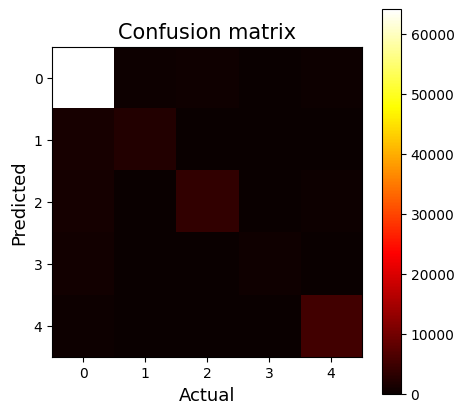

val mode | time: 19:21:51


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9463969310124715, accuracy: 0.9737500000000002, f1: 0.9066576288590248, precision: 0.8913938215156325, recall: 0.957122440771188


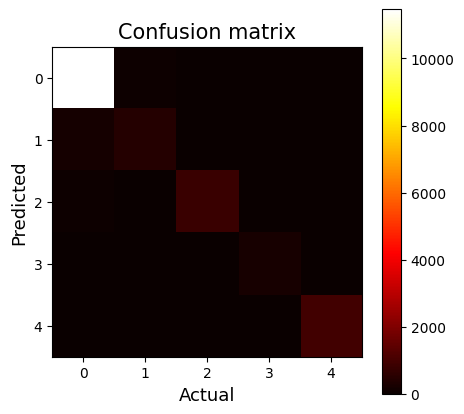


New checkpoint

train mode | time: 19:22:37


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9376728049755656, accuracy: 0.9719701257226024, f1: 0.9052812889027476, precision: 0.8930003468284013, recall: 0.9558816004775809


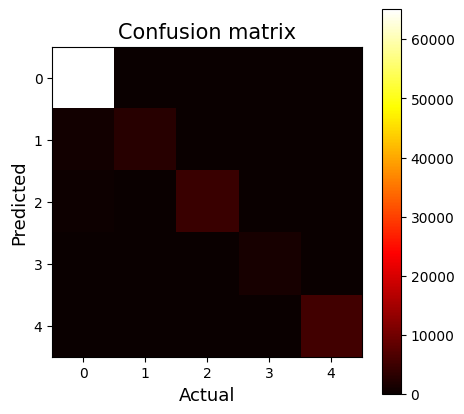

val mode | time: 19:34:47


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9399007527033488, accuracy: 0.9788194444444446, f1: 0.9188665341241983, precision: 0.8963784424425855, recall: 0.9824105533844839


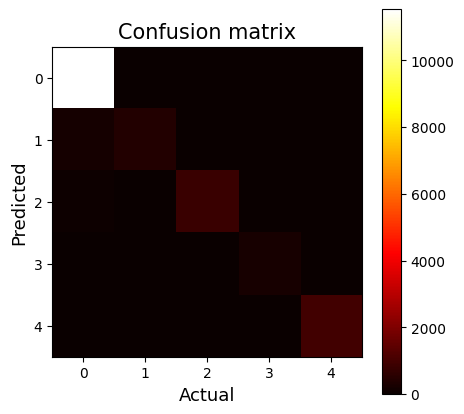


New checkpoint

train mode | time: 19:35:33


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9314559241112623, accuracy: 0.9770990823462837, f1: 0.9187879233574748, precision: 0.9076372702076074, recall: 0.9669581932263349


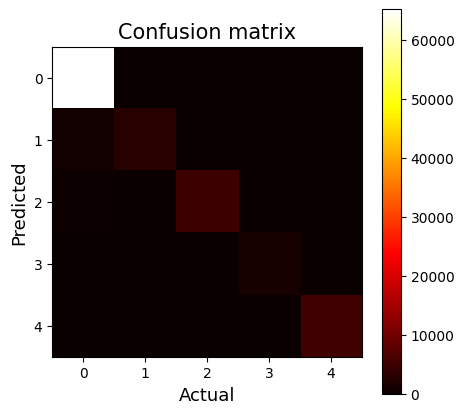

val mode | time: 19:47:00


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9370523683230082, accuracy: 0.9817361111111115, f1: 0.9352541566086463, precision: 0.9182778163780976, recall: 0.9756608930772505


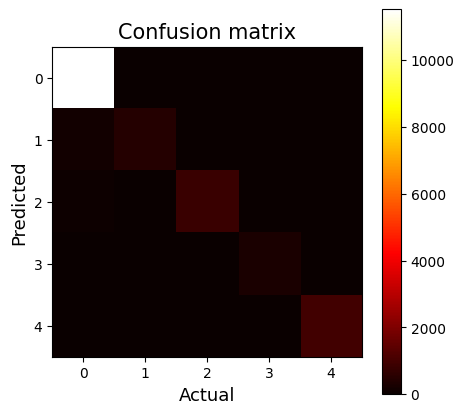

train mode | time: 19:47:43


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9282382173247522, accuracy: 0.9801153973130683, f1: 0.9302728618481669, precision: 0.9172802612372746, recall: 0.9739268055346504


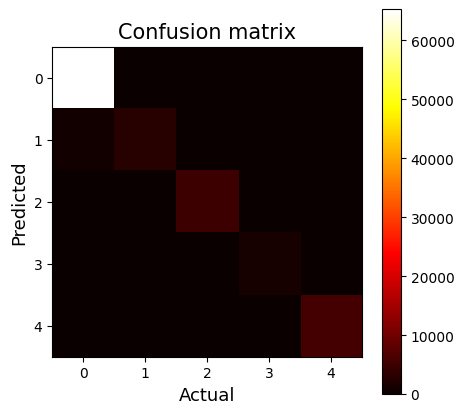

val mode | time: 19:59:10


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9326603865623474, accuracy: 0.9860416666666667, f1: 0.9435636738135995, precision: 0.9285157960064171, recall: 0.9865478004178887


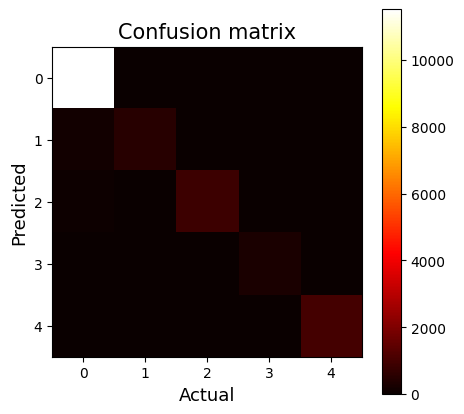

train mode | time: 19:59:53


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9248442134152822, accuracy: 0.9830462296694573, f1: 0.9376484858684794, precision: 0.9260230289962772, recall: 0.9777330982027076


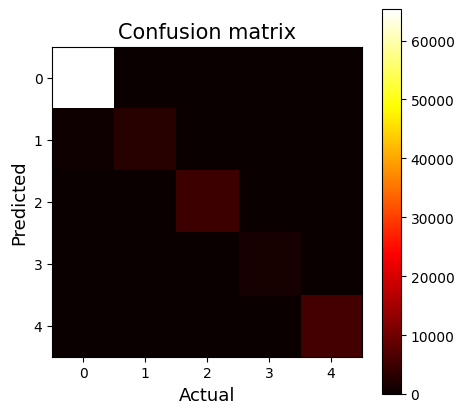

val mode | time: 20:11:23


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9310154441992442, accuracy: 0.9871527777777783, f1: 0.9486734279487876, precision: 0.9363843442681185, recall: 0.9793752701536705


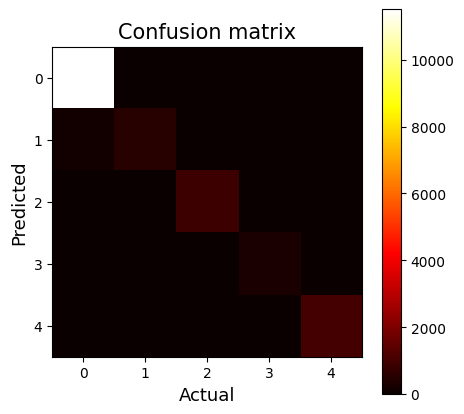

train mode | time: 20:12:06


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9231409294943458, accuracy: 0.9844712205737712, f1: 0.9409136823525489, precision: 0.9287402280440407, recall: 0.9816957764498181


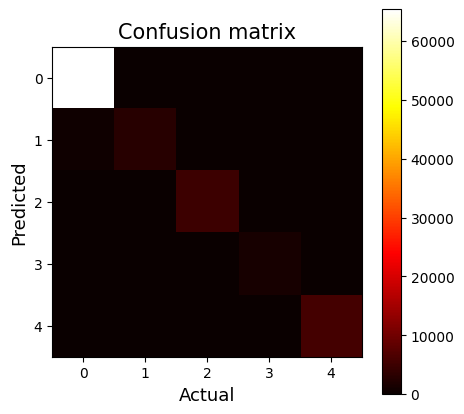

val mode | time: 20:23:31


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.93016384045283, accuracy: 0.9881944444444449, f1: 0.9503819766207157, precision: 0.9365624412108599, recall: 0.9837658101982334


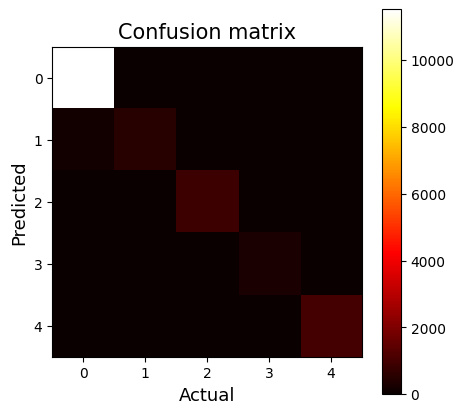


New checkpoint

train mode | time: 20:24:18


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9222160687480135, accuracy: 0.9852321421352634, f1: 0.9439996350045237, precision: 0.9323698530352015, recall: 0.9826205810802496


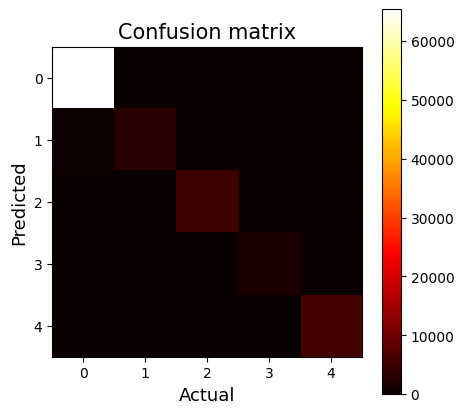

val mode | time: 20:35:43


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.93045303940773, accuracy: 0.987430555555556, f1: 0.9434519508950249, precision: 0.9340896647391662, recall: 0.9771961185442579


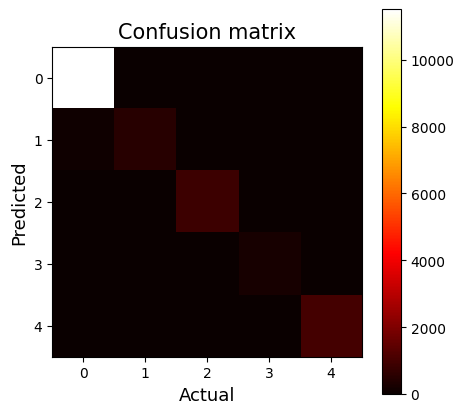


New checkpoint

train mode | time: 20:36:27


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9208043374182331, accuracy: 0.9865548065650663, f1: 0.9483484538907407, precision: 0.9356523398743257, recall: 0.9859782721322111


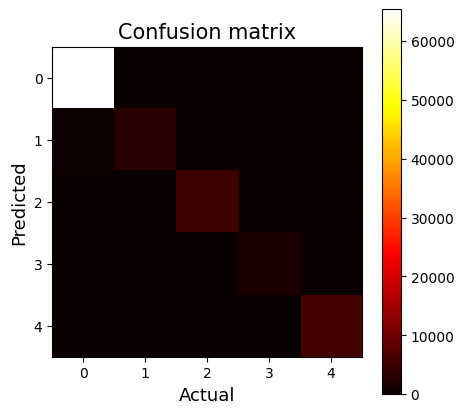

val mode | time: 20:48:07


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.929716436068217, accuracy: 0.987916666666667, f1: 0.9463959345430288, precision: 0.9326477716684154, recall: 0.9849079524151421


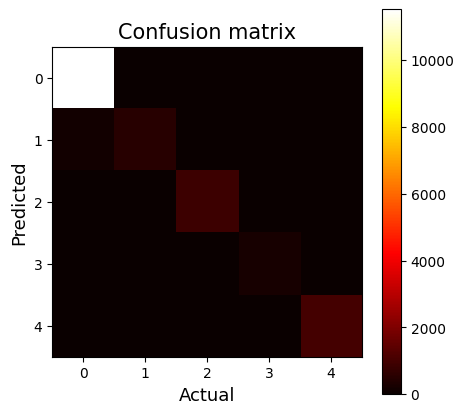


New checkpoint

train mode | time: 20:48:52


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9199757538255465, accuracy: 0.9873729972645579, f1: 0.9502868923208826, precision: 0.9378072782429598, recall: 0.9872837024853804


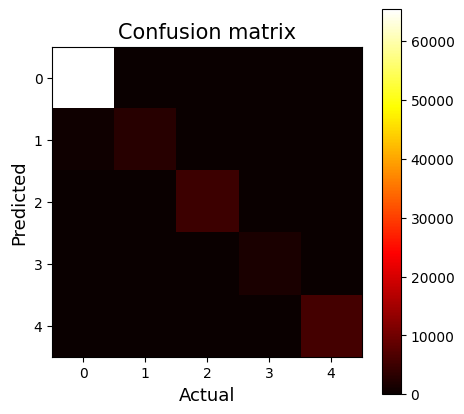

val mode | time: 21:00:15


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9279836285114288, accuracy: 0.9897222222222226, f1: 0.950571157339094, precision: 0.9370974097533856, recall: 0.9876569739806034


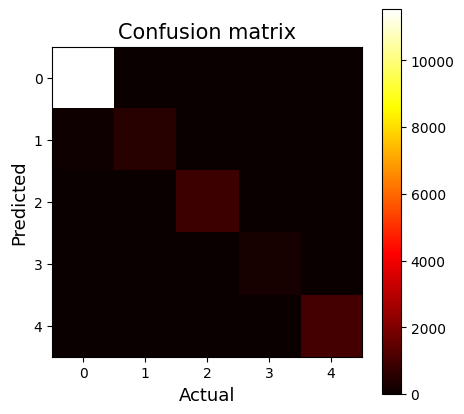


New checkpoint

train mode | time: 21:01:02


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9193006804232581, accuracy: 0.9879957991402902, f1: 0.9527596218143153, precision: 0.9402576497302544, recall: 0.9883841921725662


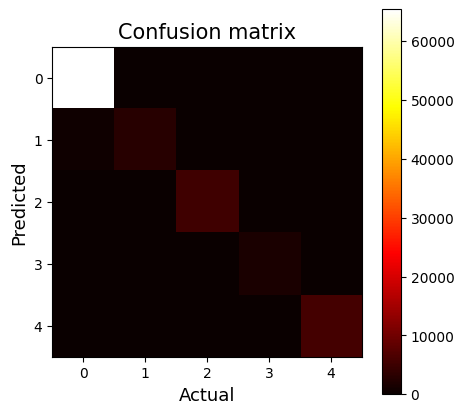

val mode | time: 21:12:23


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])
<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with nump

loss: 0.9276959153016409, accuracy: 0.9900000000000005, f1: 0.9535610047991222, precision: 0.9403290466857078, recall: 0.9871576144585114


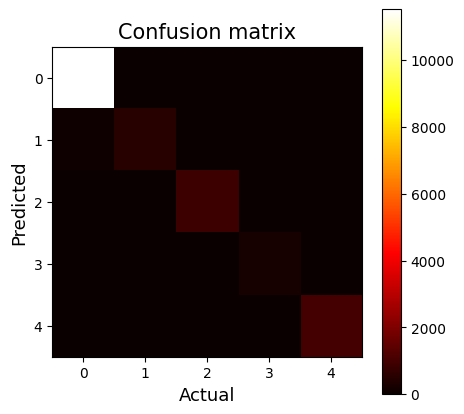

In [ ]:
#Create an object of the Trainer class, pass the model (model), learning rate (lr), batch size (batch_size), and number of epochs (num_epochs) as parameters
trainer = Trainer(net=model, lr=1e-3, batch_size=96, num_epochs=10)#100)
#train the model for the specified number of epochs
trainer.run()

In [ ]:
# Create train logs dataframe and add prefix to columns
train_logs = trainer.train_df_logs
train_logs.columns = ["train_"+ colname for colname in train_logs.columns]

# Create validation logs dataframe and add prefix to columns
val_logs = trainer.val_df_logs
val_logs.columns = ["val_"+ colname for colname in val_logs.columns]

# Concatenate train and validation logs and reset the index
logs = pd.concat([train_logs,val_logs], axis=1)
logs.reset_index(drop=True, inplace=True)

# Keep only selected columns in the logs dataframe
logs = logs.loc[:, [
    'train_loss', 'val_loss',
    'train_accuracy', 'val_accuracy',
    'train_f1', 'val_f1',
    'train_precision', 'val_precision',
    'train_recall', 'val_recall']
                                 ]
# Print the first five rows of the logs dataframe and save it as a CSV file
logs.head()
logs.to_csv('cnn.csv', index=False)


creation of instance of cnn model


In [ ]:
# create an instance of the CNN class with num_classes = 5 and hidden layer size of 128
cnn_model = CNN(num_classes=5, hid_size=128).to(config.device)

# load the state dict of the CNN model from the specified path and map it to the device
cnn_model.load_state_dict(
    torch.load(config.cnn_state_path, map_location=config.device)
)

# set the model to evaluation mode, which disables gradient calculation and dropout
cnn_model.eval()

# read the CSV file containing the logs and store it in a pandas dataframe called logs
logs = pd.read_csv(config.cnn_logs)


**data visualization**

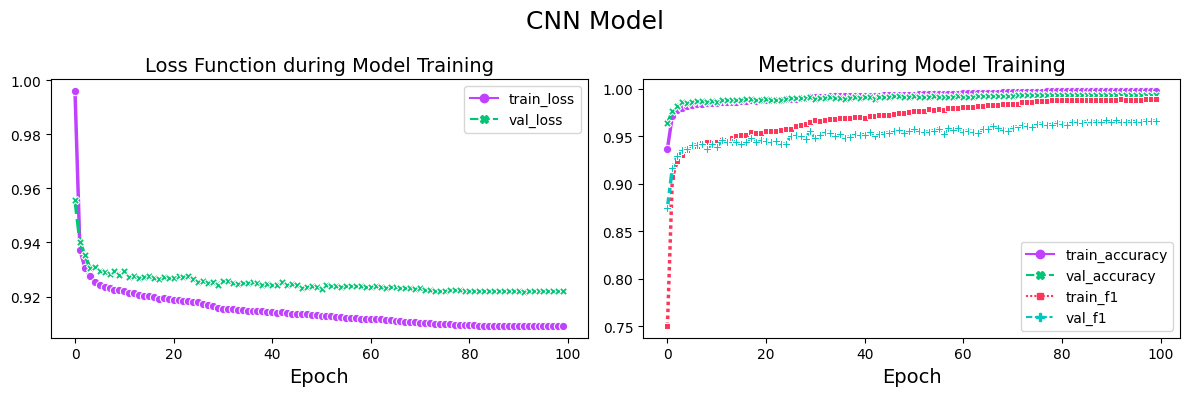

In [ ]:
# Define color palettes for plotting
colors = ['#C042FF', '#03C576FF', '#FF355A', '#03C5BF', '#96C503', '#C5035B']
palettes = [sns.color_palette(colors, 2),
            sns.color_palette(colors, 4),
            sns.color_palette(colors[:2]+colors[-2:] + colors[2:-2], 6)]

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training and validation loss over epochs in the first subplot
sns.lineplot(data=logs.iloc[:, :2], palette=palettes[0], markers=True, ax=ax[0], linewidth=2.5,)
ax[0].set_title("Loss Function during Model Training", fontsize=14)
ax[0].set_xlabel("Epoch", fontsize=14)

# Plot the training and validation accuracy, F1 score, precision, and recall over epochs in the second subplot
sns.lineplot(data=logs.iloc[:, 2:6], palette=palettes[1], markers=True, ax=ax[1], linewidth=2.5, legend="full")
ax[1].set_title("Metrics during Model Training", fontsize=15)
ax[1].set_xlabel("Epoch", fontsize=14)

# Add a title to the figure
plt.suptitle('CNN Model', fontsize=18)

# Adjust the layout of the subplots
plt.tight_layout()

# Save the figure as a PNG and SVG file
fig.savefig("cnn.png", format="png",  pad_inches=0.2, transparent=False, bbox_inches='tight')
fig.savefig("cnn.svg", format="svg",  pad_inches=0.2, transparent=False, bbox_inches='tight')


In [ ]:
# Define an LSTM model with 1 input, 64 hidden units, and a bidirectional LSTM layer, and move it to the specified device
lstm_model = RNNModel(1, 64, 'lstm', True).to(config.device)

# Load the state dictionary of the LSTM model from the specified path on the specified device
lstm_model.load_state_dict(
    torch.load(config.lstm_state_path,
               map_location=config.device)
)

# Set the LSTM model to evaluation mode
lstm_model.eval()

# Read the CSV file of the LSTM training logs from the specified path and store it in a DataFrame
logs = pd.read_csv(config.lstm_logs)


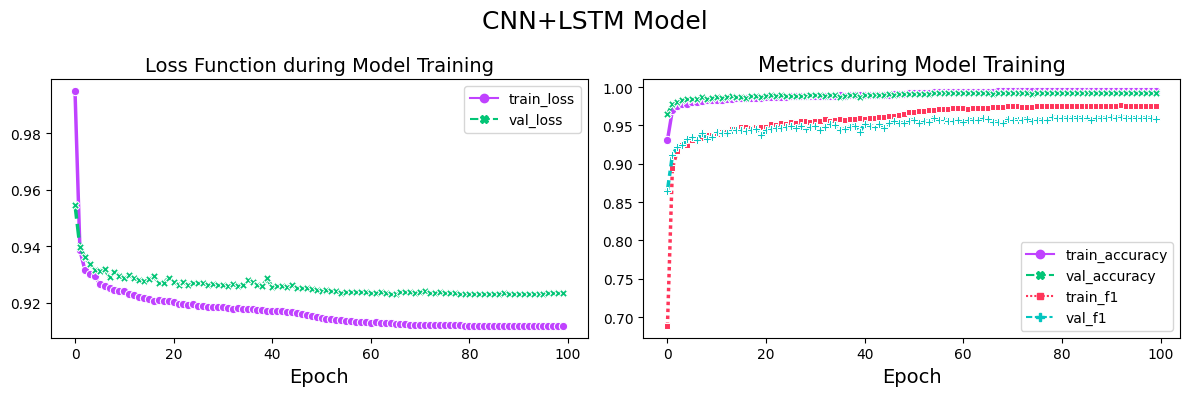

In [ ]:
# Define color palettes for the plots
colors = ['#C042FF', '#03C576FF', '#FF355A', '#03C5BF', '#96C503', '#C5035B']
palettes = [
    sns.color_palette(colors, 2),
    sns.color_palette(colors, 4),
    sns.color_palette(colors[:2]+colors[-2:] + colors[2:-2], 6)
]

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training and validation loss on the first subplot
sns.lineplot(data=logs.iloc[:, :2], palette=palettes[0], markers=True, ax=ax[0], linewidth=2.5,)
ax[0].set_title("Loss Function during Model Training", fontsize=14)
ax[0].set_xlabel("Epoch", fontsize=14)

# Plot the training and validation metrics on the second subplot
sns.lineplot(data=logs.iloc[:, 2:6], palette=palettes[1], markers=True, ax=ax[1], linewidth=2.5, legend="full")
ax[1].set_title("Metrics during Model Training", fontsize=15)
ax[1].set_xlabel("Epoch", fontsize=14)

# Add a title to the figure
plt.suptitle('CNN+LSTM Model', fontsize=18)

# Adjust the layout of the subplots
plt.tight_layout()

# Save the figure as a PNG image with a tight bounding box
fig.savefig("lstm.png", format="png",  pad_inches=0.2, transparent=False, bbox_inches='tight')

# Save the figure as an SVG image with a tight bounding box
fig.savefig("lstm.svg", format="svg",  pad_inches=0.2, transparent=False, bbox_inches='tight')


In [ ]:
# create an instance of the RNNAttentionModel class with 1 input feature, 64 hidden units, LSTM architecture, and no bidirectional processing
attn_model = RNNAttentionModel(1, 64, 'lstm', False).to(config.device)

# load the saved state of the model from the specified file path onto the model instance created above, on the specified device
attn_model.load_state_dict(
    torch.load(config.attn_state_path,
               map_location=config.device)
)

# set the model to evaluation mode
attn_model.eval()

# load the training logs of the model from the specified file path into a pandas dataframe
logs = pd.read_csv(config.attn_logs)


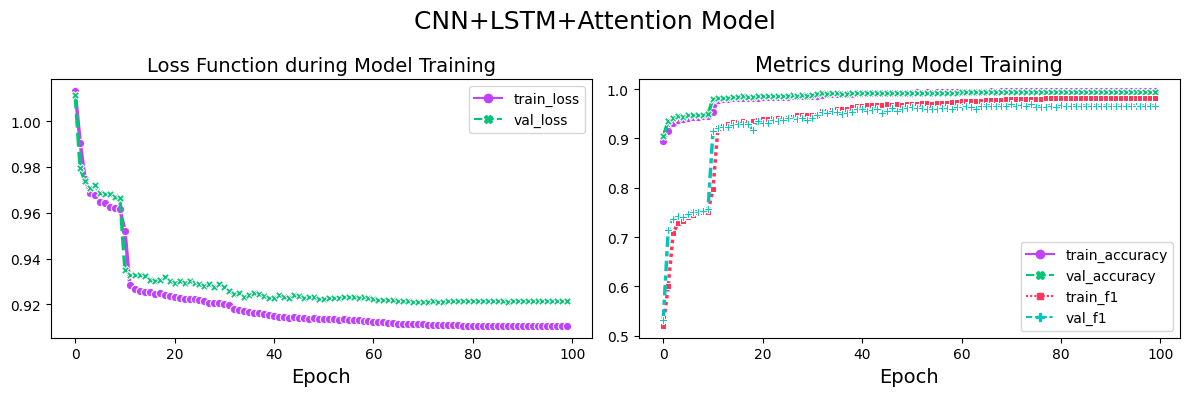

In [ ]:
# Define a list of colors to use in the plot
colors = ['#C042FF', '#03C576FF', '#FF355A', '#03C5BF', '#96C503', '#C5035B']

# Create a list of palettes, each with a different number of colors from the colors list
palettes = [sns.color_palette(colors, 2),
            sns.color_palette(colors, 4),
            sns.color_palette(colors[:2]+colors[-2:] + colors[2:-2], 6)]

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Create a line plot of the first two columns of the logs DataFrame on the first subplot, using the first palette from the palettes list
sns.lineplot(data=logs.iloc[:, :2], palette=palettes[0], markers=True, ax=ax[0], linewidth=2.5,)
ax[0].set_title("Loss Function during Model Training", fontsize=14)
ax[0].set_xlabel("Epoch", fontsize=14)

# Create a line plot of the last four columns of the logs DataFrame on the second subplot, using the second palette from the palettes list
sns.lineplot(data=logs.iloc[:, 2:6], palette=palettes[1], markers=True, ax=ax[1], linewidth=2.5, legend="full")
ax[1].set_title("Metrics during Model Training", fontsize=15)
ax[1].set_xlabel("Epoch", fontsize=14)

# Add a title to the entire figure
plt.suptitle('CNN+LSTM+Attention Model', fontsize=18)

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure as a PNG and SVG file
fig.savefig("attn.png", format="png",  pad_inches=0.2, transparent=False, bbox_inches='tight')
fig.savefig("attn.svg", format="svg",  pad_inches=0.2, transparent=False, bbox_inches='tight')


In [ ]:
# read the CSV file containing the test data and load it into a pandas DataFrame
test_df = pd.read_csv(config.test_csv_path)

# print the shape of the test DataFrame (number of rows and columns)
print(test_df.shape)

# create an instance of the ECGDataset class for the test data, using the test DataFrame created above
test_dataset = ECGDataset(test_df)

# create a DataLoader object for the test dataset, which can be used to iterate over the data in batches during evaluation
# set the batch size to 96, use 0 workers for loading data in parallel, and do not shuffle the data
test_dataloader = DataLoader(dataset=test_dataset, batch_size=96, num_workers=0, shuffle=False)


(17008, 189)


In [ ]:
#Define a function for the test stage which takes a dataloader, a model and a boolean flag probs as input parameters
def make_test_stage(dataloader, model, probs=False):
  # Create empty lists for the classification predictions and ground truths
    cls_predictions = []
    cls_ground_truths = []

    # Loop through the dataloader to get the data and classification target labels
for i, (data, cls_target) in enumerate(dataloader):
    with torch.no_grad(): # Disable gradient computation during inference

        data = data.to(config.device) # Send data to GPU
        cls_target = cls_target.cpu() # Send classification targets to CPU
        cls_prediction = model(data) # Compute classification predictions for the input data

        # If the flag probs is False, select the class with the highest probability as the prediction
        if not probs:
            cls_prediction = torch.argmax(cls_prediction, dim=1)

        cls_predictions.append(cls_prediction.detach().cpu()) # Append the classification predictions to the list
        cls_ground_truths.append(cls_target) # Append the classification ground truths to the list

# Concatenate the classification predictions and ground truths into numpy arrays and return them
predictions_cls = torch.cat(cls_predictions).numpy()
ground_truths_cls = torch.cat(cls_ground_truths).numpy()
return predictions_cls, ground_truths_cls

In [ ]:
#his line creates a list models that contains the cnn_model, lstm_model, and attn_model
#Each model is an instance of a PyTorch neural network model class that was previously defined and instantiated
models = [cnn_model, lstm_model, attn_model]


In [ ]:
y_pred, y_true = make_test_stage(test_dataloader, models[0])
y_pred.shape, y_true.shape

<ipython-input-17-8280d9e6efbe>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  signal = torch.FloatTensor([signal.values])


((17008,), (17008,))

In [ ]:
report = pd.DataFrame(
    classification_report(
        y_pred,
        y_true,
        output_dict=True
    )
    #transpose the DataFrame to have the classes as the rows and the metrics (precision, recall, f1-score, and support) as columns
).transpose()

In [ ]:
report.head

<bound method NDFrame.head of               precision    recall  f1-score       support
0              0.999264  0.991313  0.995272  13698.000000
1              0.885457  0.991354  0.935418    694.000000
2              0.976959  0.985130  0.981027   1076.000000
3              0.960114  0.982507  0.971182    343.000000
4              0.990879  0.998329  0.994590   1197.000000
accuracy       0.991239  0.991239  0.991239      0.991239
macro avg      0.962534  0.989727  0.975498  17008.000000
weighted avg   0.991829  0.991239  0.991395  17008.000000>

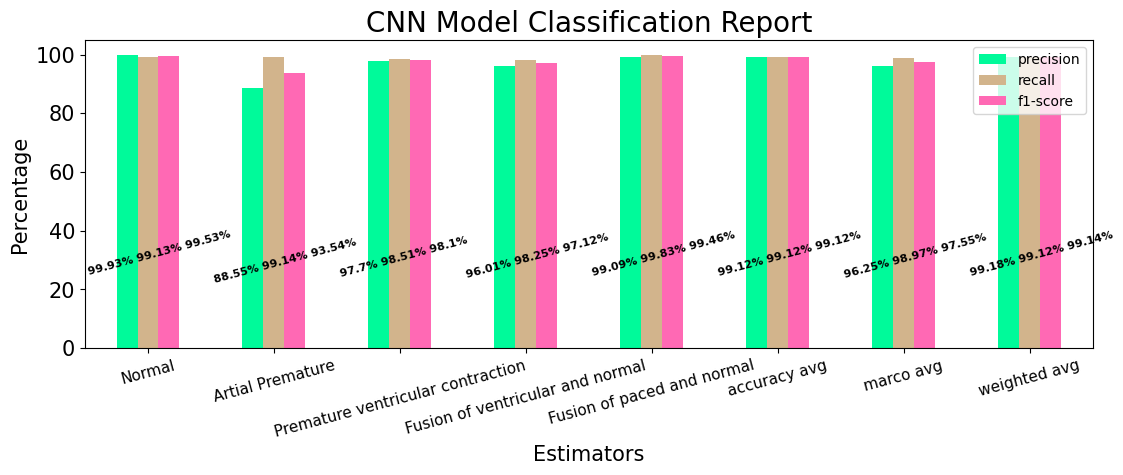

In [ ]:
# Define a list of color codes
colors = ['#00FA9A', '#D2B48C', '#FF69B4']

# Convert classification report values to percentages and plot a bar graph
report_plot = report.apply(lambda x: x*100)
ax = report_plot[["precision", "recall", "f1-score"]].plot(kind='bar', figsize=(13, 4), legend=True, fontsize=15, color=colors)

# Set the X-axis label and tick labels, and the Y-axis label
ax.set_xlabel("Estimators", fontsize=15)
ax.set_xticklabels(list(id_to_label.values())+["accuracy avg", "marco avg", "weighted avg"], rotation=15, fontsize=11)
ax.set_ylabel("Percentage", fontsize=15)

# Set the plot title
plt.title("CNN Model Classification Report", fontsize=20)

# Add percentages to the bar plot
for percentage, p in zip(report[['precision', 'recall', 'f1-score']].values, ax.patches):
    percentage = " ".join([str(round(i*100, 2))+"%" for i in percentage])
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_y() + p.get_height() / 4
    ax.annotate(percentage, (x, y), fontsize=8, rotation=15, fontweight='bold')

# Save the figure as PNG and SVG files
fig.savefig("cnn_report.png", format="png",  pad_inches=0.2, transparent=False, bbox_inches='tight')
fig.savefig("cnn_report.svg", format="svg",  pad_inches=0.2, transparent=False, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
y_pred, y_true = make_test_stage(test_dataloader, models[1])
y_pred.shape, y_true.shape

((17008,), (17008,))

In [ ]:
# create an empty numpy array to hold the predictions
y_pred = np.zeros((y_pred.shape[0], 5), dtype=np.float32)

# loop through each model and make predictions on the test dataset
for i, model in enumerate(models, 1):
    y_pred_, y_true = make_test_stage(test_dataloader, model, True)
    y_pred += y_pred_

# divide the sum of the predictions by the number of models to get an average prediction
y_pred /= i

# get the class with the highest predicted probability for each example
y_pred = np.argmax(y_pred, axis=1)


In [ ]:
report = pd.DataFrame(
    classification_report(
        y_pred,
        y_true,
        output_dict=True
    )
).transpose()

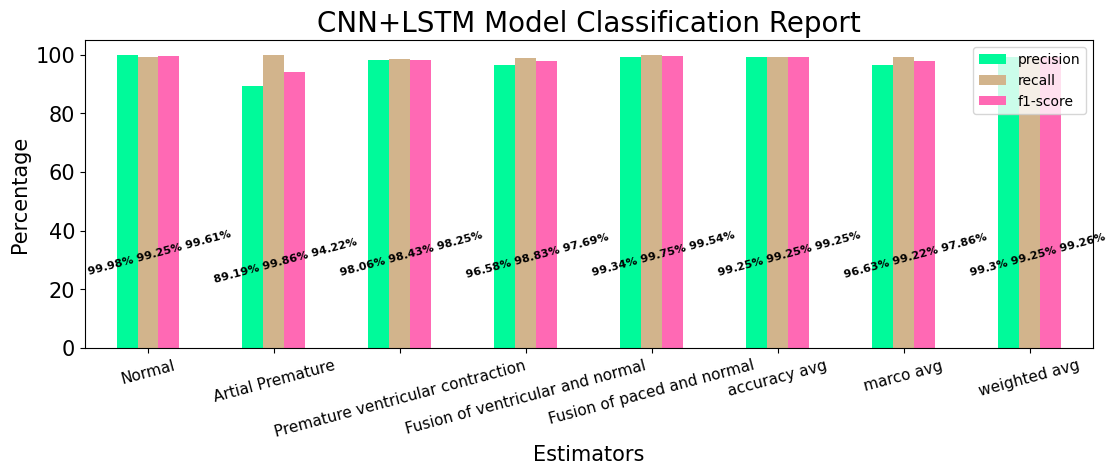

In [ ]:
colors = ['#00FA9A', '#D2B48C', '#FF69B4'] # A list of three colors for the bar plot
report_plot = report.apply(lambda x: x*100) # Multiply each value in the report DataFrame by 100 and assign it to report_plot
ax = report_plot[["precision", "recall", "f1-score"]].plot(kind='bar', figsize=(13, 4), legend=True, fontsize=15, color=colors) # Generate the bar plot for precision, recall, and f1-score
ax.set_xlabel("Estimators", fontsize=15) # Set the label for x-axis
ax.set_xticklabels(list(id_to_label.values())+["accuracy avg", "marco avg", "weighted avg"], rotation=15, fontsize=11) # Set the labels for each x-tick
ax.set_ylabel("Percentage", fontsize=15) # Set the label for y-axis
plt.title("CNN+LSTM Model Classification Report", fontsize=20) # Set the title for the plot

# Loop through each bar in the plot and annotate it with the corresponding percentage value
for percentage, p in zip(report[['precision', 'recall', 'f1-score']].values, ax.patches):
    percentage = " ".join([str(round(i*100, 2))+"%" for i in percentage])
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_y() + p.get_height() / 4
    ax.annotate(percentage, (x, y), fontsize=8, rotation=15, fontweight='bold')

fig.savefig("lstm_report.png", format="png",  pad_inches=0.2, transparent=False, bbox_inches='tight') # Save the plot as a PNG file
fig.savefig("lstm_report.svg", format="svg",  pad_inches=0.2, transparent=False, bbox_inches='tight') # Save the plot as a SVG file
plt.show() # Show the plot in the Jupyter Notebook or the interactive shell.


In [ ]:
y_pred, y_true = make_test_stage(test_dataloader, models[2])
y_pred.shape, y_true.shape

((17008,), (17008,))

In [ ]:
report = pd.DataFrame(
    classification_report(
        y_pred,
        y_true,
        output_dict=True
    )
).transpose()

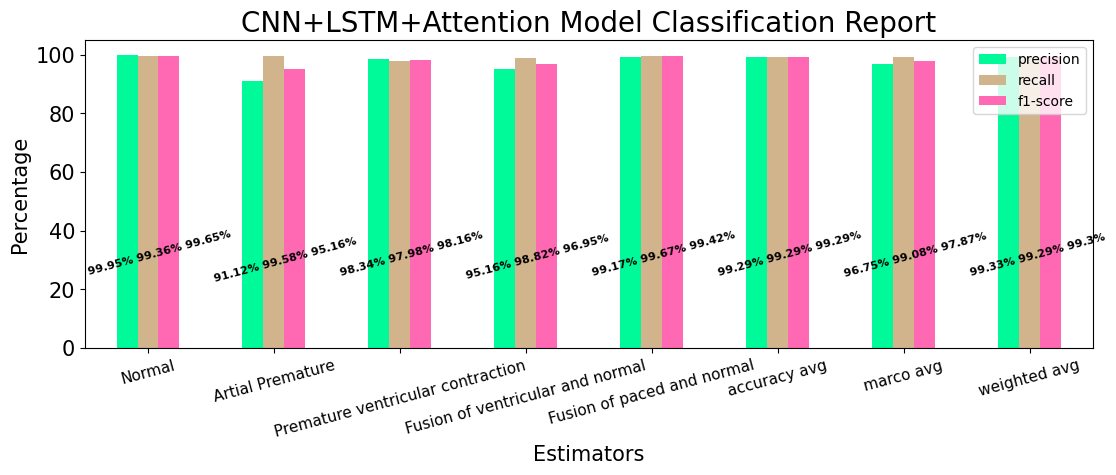

In [ ]:
# Define colors for the bar plot
colors = ['#00FA9A', '#D2B48C', '#FF69B4'] # or use random.choices(list(mcolors.CSS4_COLORS.values()), k=3) for random colors

# Scale report values to percentages
report_plot = report.apply(lambda x: x*100)

# Create a bar plot for precision, recall, and f1-score
ax = report_plot[["precision", "recall", "f1-score"]].plot(kind='bar', figsize=(13, 4), legend=True, fontsize=15, color=colors)

# Set labels for x-axis and y-axis
ax.set_xlabel("Estimators", fontsize=15)
ax.set_ylabel("Percentage", fontsize=15)

# Set x-tick labels and rotate them by 15 degrees
ax.set_xticklabels(list(id_to_label.values())+["accuracy avg", "marco avg", "weighted avg"], rotation=15, fontsize=11)

# Set the title of the plot
plt.title("CNN+LSTM+Attention Model Classification Report", fontsize=20)

# Add annotations for the percentages for each bar
for percentage, p in zip(report[['precision', 'recall', 'f1-score']].values, ax.patches):
    percentage = " ".join([str(round(i*100, 2))+"%" for i in percentage])
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_y() + p.get_height() / 4
    ax.annotate(percentage, (x, y), fontsize=8, rotation=15, fontweight='bold')

# Save the plot as a png and svg file
fig.savefig("attn_report.png", format="png",  pad_inches=0.2, transparent=False, bbox_inches='tight')
fig.savefig("attn_report.svg", format="svg",  pad_inches=0.2, transparent=False, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
# Initialize an empty numpy array of size (number of samples in y_pred, 5) with a data type of float32
y_pred = np.zeros((y_pred.shape[0], 5), dtype=np.float32)

# Iterate over each model in the list of models using enumerate to keep track of the index and model
for i, model in enumerate(models, 1):

    # Get the predicted labels for the test dataset using the current model and the make_test_stage function
    y_pred_, y_true = make_test_stage(test_dataloader, model, True)

    # Add the predicted labels to y_pred
    y_pred += y_pred_

# Divide y_pred by the number of models to get the average of the predicted labels for each sample
y_pred /= i

# Get the index of the maximum value for each sample in y_pred, which corresponds to the predicted class
y_pred = np.argmax(y_pred, axis=1)


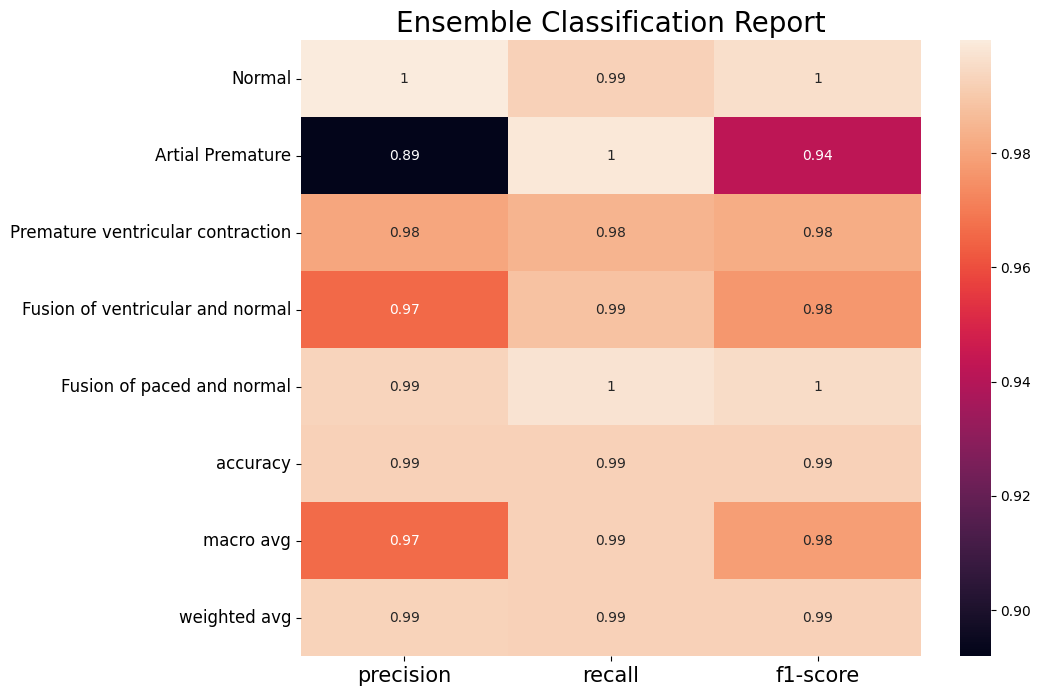

In [ ]:
# Compute the classification report using the predicted and true labels
clf_report = classification_report(y_pred,
                                   y_true,
                                   labels=[0,1,2,3,4],  # Specify the labels to be included in the report
                                   target_names=list(id_to_label.values()),  # Map the labels to their corresponding names
                                   output_dict=True)  # Output the report as a dictionary

# Plot the report as a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the figure
ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)  # Create the heatmap using Seaborn
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)  # Set the font size of the x-axis labels
ax.set_yticklabels(ax.get_yticklabels(),fontsize=12, rotation=0)  # Set the font size and rotation of the y-axis labels
plt.title("Ensemble Classification Report", fontsize=20)  # Set the title and font size of the plot
plt.savefig(f"ensemble result.svg",format="svg",bbox_inches='tight', pad_inches=0.2)  # Save the plot as a vector image
plt.savefig(f"ensemble result.png", format="png",bbox_inches='tight', pad_inches=0.2)  # Save the plot as a raster image


In [ ]:
clf_report

{'Normal': {'precision': 0.9997792332033262,
  'recall': 0.9924757104244284,
  'f1-score': 0.9961140846103086,
  'support': 13689},
 'Artial Premature': {'precision': 0.8918918918918919,
  'recall': 0.9985590778097982,
  'f1-score': 0.9422161794697484,
  'support': 694},
 'Premature ventricular contraction': {'precision': 0.9806451612903225,
  'recall': 0.9842738205365402,
  'f1-score': 0.9824561403508771,
  'support': 1081},
 'Fusion of ventricular and normal': {'precision': 0.9658119658119658,
  'recall': 0.9883381924198251,
  'f1-score': 0.9769452449567723,
  'support': 343},
 'Fusion of paced and normal': {'precision': 0.9933665008291874,
  'recall': 0.9975020815986678,
  'f1-score': 0.9954299958454508,
  'support': 1201},
 'accuracy': 0.9924741298212606,
 'macro avg': {'precision': 0.9662989506053389,
  'recall': 0.992229776557852,
  'f1-score': 0.9786323290466316,
  'support': 17008},
 'weighted avg': {'precision': 0.9930229884417627,
  'recall': 0.9924741298212606,
  'f1-score':